## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-
-

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [13]:
class Node:
    def __init__(self, value, code = None, left = None, right = None) -> None:
        self.value = value
        self.left_child = left
        self.right_child = right
        self.code = code

class Huffman:
    @staticmethod
    def encode(text: str) -> tuple[str, dict[str, str]]:
        length, output_chance_dict, sorted_dict = len(text), {}, []

        for i in text:
            output_chance_dict.setdefault(i, 0)
            output_chance_dict[i] += 1/length

        sorted_dict = {Node(value, key) for key, value in output_chance_dict.items()}

        sorted_dict = sorted(sorted_dict, key = lambda x: x.value)

        # Build tree

        while len(sorted_dict) > 1:
            sorted_dict.append(Node(sorted_dict[0].value + sorted_dict[1].value, left = sorted_dict.pop(0), right = sorted_dict.pop(0)))
            sorted_dict = sorted(sorted_dict, key = lambda x: x.value)

        # Encode characters

        encoding_dictinary = {}

        def recursive_encode(node:Node, existing_code):
            if node.code is not None:
                encoding_dictinary[node.code] = existing_code
                return
            recursive_encode(node.left_child, existing_code + '0')
            recursive_encode(node.right_child, existing_code + '1')

        recursive_encode(sorted_dict[0], '')
        return "".join([encoding_dictinary[i] for i in text]) ,encoding_dictinary

    @staticmethod
    def decode(code: str, coding_dict: dict[str, str]):
        if code == '':
            return list(coding_dict.keys())[0]
        point_now, number, output = '', 0, ''
        while code:
            point_now += code[number]
            for key, value in coding_dict.items():
                if point_now == value:
                    code = code[number + 1:]
                    number = -1
                    output += key
                    point_now = ''
                    break
            number += 1
        return output


# Алгоритм LZW

In [14]:
class LZW:

    @staticmethod
    def encode(text: str) -> tuple[str, list]:
        if not text:
            return text, []
        if len(text) == 1:
            return '0', [text]
        key_dictinary = sorted(set(text))

        initial_dictinary = key_dictinary.copy()

        length = len(text)
        current_code, output_code = text[0], ''
        current_pos = 1
        while current_pos < length:
            add_code = current_code + text[current_pos]
            if add_code in key_dictinary:
                current_code = add_code
                current_pos += 1
            else:
                output_code += str(key_dictinary.index(add_code[:-1])) + ' '
                key_dictinary.append(add_code)
                current_code = ''
        output_code += str(key_dictinary.index(add_code))
        return output_code, initial_dictinary

    @staticmethod
    def decode(code: str, coding_dict: list) -> str:
        if code == '':
            return ''
        if len(code) == 1:
            return coding_dict[0]
        starter_coding_dict = coding_dict.copy()
        output_text = ''
        current_pos_decode, code = 0, code.split(' ')
        lenght = len(code)
        while current_pos_decode < lenght:
            add_text = int(code[current_pos_decode])
            if add_text < len(coding_dict):
                output_text += coding_dict[add_text]
                current_pos_decode += 1
            else:
                coding_dict = starter_coding_dict.copy()
                current_code = ''
                current_pos_encode, add_code = 0, ''
                while len(coding_dict) <= add_text:     ### Double count
                    if current_pos_encode >= len(output_text):
                        coding_dict.append(add_code + add_code[0])
                    else:
                        add_code = current_code + output_text[current_pos_encode]
                    if add_code in coding_dict:
                        current_code = add_code
                        current_pos_encode += 1
                    else:
                        coding_dict.append(add_code)
                        current_code = ''
        return output_text


In [15]:
import string
import random
import time
import matplotlib.pyplot as plt

In [16]:

def generate_random_string(n: int) -> str:
    """Generate random string of n"""
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=n))


Test correctness and plot algorithms

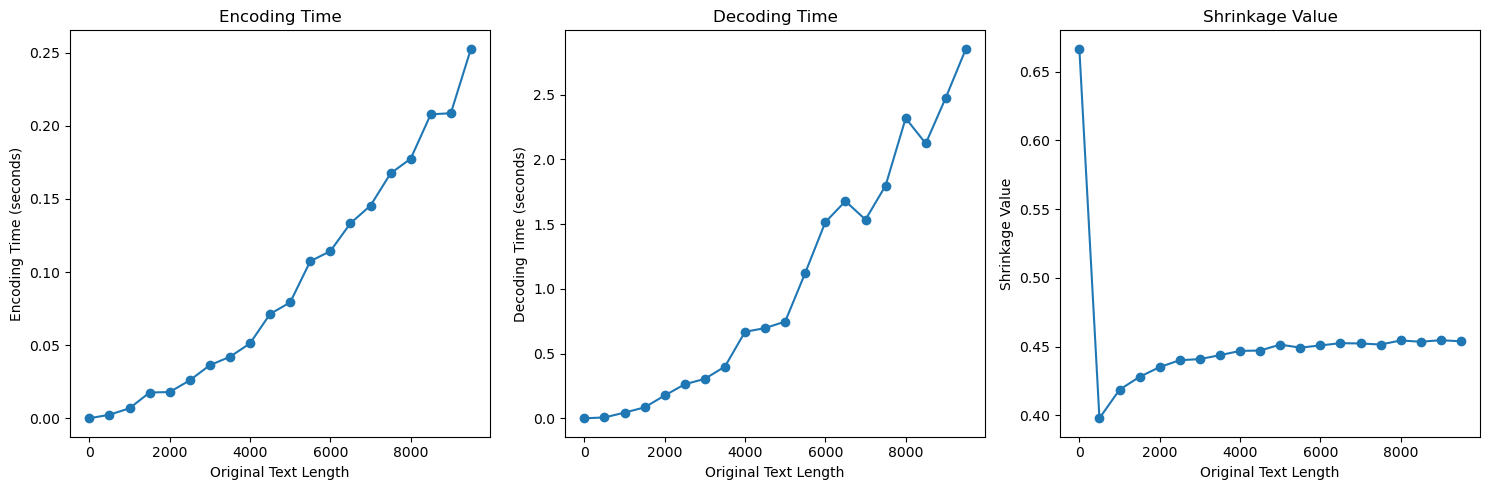

In [17]:

def test_correctness_lzw():
    original_lengths = []
    performance_times_encode = []
    performance_times_decode = []
    shrinkage_values = []

    for n in range(2, 10000, 500):
        text = generate_random_string(n)
        original_lengths.append(len(text))
        
        lzw = LZW()

        start_time = time.time()
        encoded = lzw.encode(text)
        encoding_time = time.time() - start_time
        performance_times_encode.append(encoding_time)

        start_time = time.time()
        decoded_encoded_text = lzw.decode(encoded[0], encoded[1])
        decoding_time = time.time() - start_time
        performance_times_decode.append(decoding_time)

        assert text.strip() == decoded_encoded_text

        encoded_text_length = len(encoded[0])
        shrinkage_values.append(len(text) / encoded_text_length)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(original_lengths, performance_times_encode, marker='o')
    plt.title('Encoding Time')
    plt.xlabel('Original Text Length')
    plt.ylabel('Encoding Time (seconds)')

    plt.subplot(1, 3, 2)
    plt.plot(original_lengths, performance_times_decode, marker='o')
    plt.title('Decoding Time')
    plt.xlabel('Original Text Length')
    plt.ylabel('Decoding Time (seconds)')

    plt.subplot(1, 3, 3)
    plt.plot(original_lengths, shrinkage_values, marker='o')
    plt.title('Shrinkage Value')
    plt.xlabel('Original Text Length')
    plt.ylabel('Shrinkage Value')

    plt.tight_layout()
    plt.show()
test_correctness_lzw()


Алгоритм lzw добре підходить для стиснення великих даних, оскільки використовує словник. Також добре стискає дані, що повторюються. З мінусів цього аглоритму є велике використання пам'яті через словник та відносно погана праця з невеликими даними.

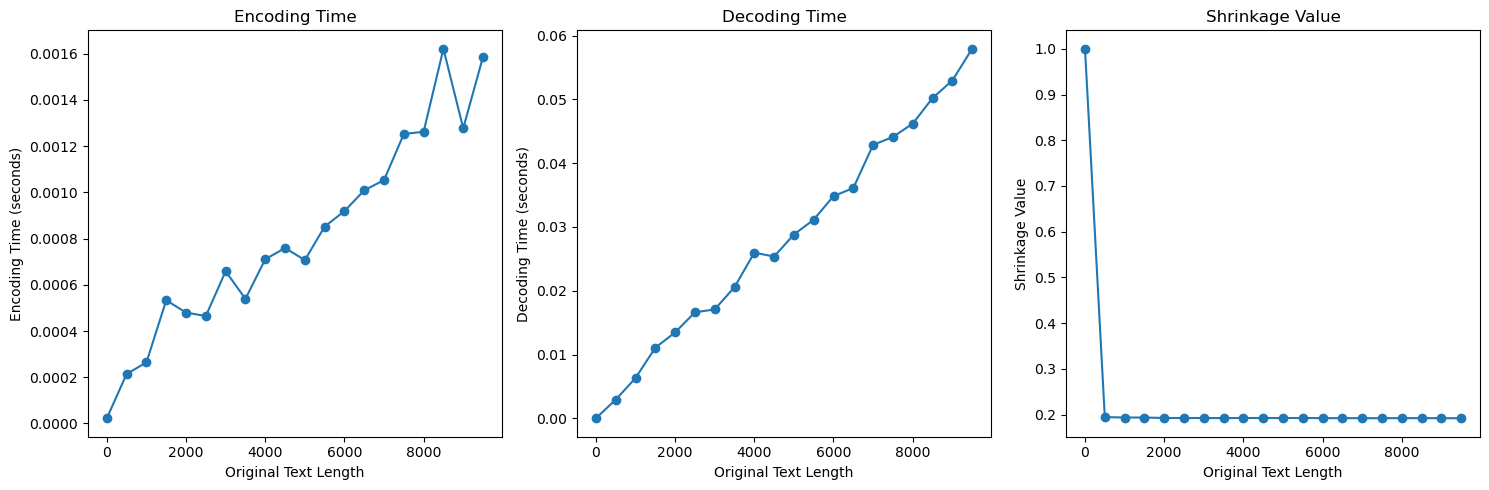

In [18]:
def test_correctness_huffman2():
    original_lengths = []
    performance_times_encode = []
    performance_times_decode = []
    shrinkage_values = []

    for n in range(2, 10000, 500):
        text = generate_random_string(n)
        original_lengths.append(len(text))
        
        huffman = Huffman()

        start_time = time.time()
        encoded = huffman.encode(text)
        encoding_time = time.time() - start_time
        performance_times_encode.append(encoding_time)

        start_time = time.time()
        decoded_encoded_text = huffman.decode(encoded[0], encoded[1])
        decoding_time = time.time() - start_time
        performance_times_decode.append(decoding_time)

        assert text.strip() == decoded_encoded_text

        encoded_text_length = len(encoded[0])
        shrinkage_values.append(len(text) / encoded_text_length)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(original_lengths, performance_times_encode, marker='o')
    plt.title('Encoding Time')
    plt.xlabel('Original Text Length')
    plt.ylabel('Encoding Time (seconds)')

    plt.subplot(1, 3, 2)
    plt.plot(original_lengths, performance_times_decode, marker='o')
    plt.title('Decoding Time')
    plt.xlabel('Original Text Length')
    plt.ylabel('Decoding Time (seconds)')

    plt.subplot(1, 3, 3)
    plt.plot(original_lengths, shrinkage_values, marker='o')
    plt.title('Shrinkage Value')
    plt.xlabel('Original Text Length')
    plt.ylabel('Shrinkage Value')

    plt.tight_layout()
    plt.show()

test_correctness_huffman2()

Алгоритм Гаффмана добре підходить для відносно невеликих даних. Із плюсів можна виділити непотрібність ніякого словника, що робить його легшим у використання пам'яті.

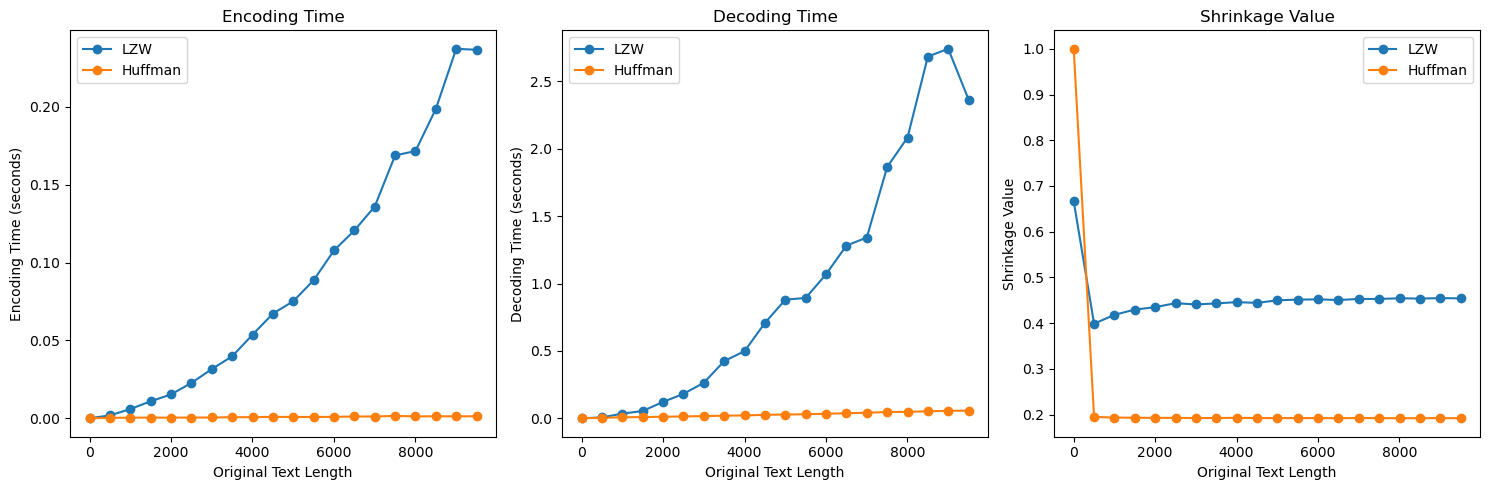

In [19]:

def test_correctness_compression():
    original_lengths = []
    lzw_performance_times_encode = []
    lzw_performance_times_decode = []
    lzw_shrinkage_values = []
    huffman_performance_times_encode = []
    huffman_performance_times_decode = []
    huffman_shrinkage_values = []

    for n in range(2, 10000, 500):
        text = generate_random_string(n)
        original_lengths.append(len(text))
        
        lzw = LZW()
        huffman = Huffman()

        start_time = time.time()
        lzw_encoded = lzw.encode(text)
        lzw_encoding_time = time.time() - start_time
        lzw_performance_times_encode.append(lzw_encoding_time)

        start_time = time.time()
        lzw_decoded_text = lzw.decode(lzw_encoded[0], lzw_encoded[1])
        lzw_decoding_time = time.time() - start_time
        lzw_performance_times_decode.append(lzw_decoding_time)

        assert text.strip() == lzw_decoded_text

        lzw_encoded_text_length = len(lzw_encoded[0])
        lzw_shrinkage_values.append(len(text) / lzw_encoded_text_length)

        start_time = time.time()
        huffman_encoded = huffman.encode(text)
        huffman_encoding_time = time.time() - start_time
        huffman_performance_times_encode.append(huffman_encoding_time)

        start_time = time.time()
        huffman_decoded_text = huffman.decode(huffman_encoded[0], huffman_encoded[1])
        huffman_decoding_time = time.time() - start_time
        huffman_performance_times_decode.append(huffman_decoding_time)

        assert text.strip() == huffman_decoded_text

        huffman_encoded_text_length = len(huffman_encoded[0])
        huffman_shrinkage_values.append(len(text) / huffman_encoded_text_length)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(original_lengths, lzw_performance_times_encode, marker='o', label='LZW')
    plt.plot(original_lengths, huffman_performance_times_encode, marker='o', label='Huffman')
    plt.title('Encoding Time')
    plt.xlabel('Original Text Length')
    plt.ylabel('Encoding Time (seconds)')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(original_lengths, lzw_performance_times_decode, marker='o', label='LZW')
    plt.plot(original_lengths, huffman_performance_times_decode, marker='o', label='Huffman')
    plt.title('Decoding Time')
    plt.xlabel('Original Text Length')
    plt.ylabel('Decoding Time (seconds)')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(original_lengths, lzw_shrinkage_values, marker='o', label='LZW')
    plt.plot(original_lengths, huffman_shrinkage_values, marker='o', label='Huffman')
    plt.title('Shrinkage Value')
    plt.xlabel('Original Text Length')
    plt.ylabel('Shrinkage Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

test_correctness_compression()


На невеликих даних можемо побачити домінацію алгоритму Гаффмана, оскільки це його спеціалізація. Проте ситуація б змінилась із зростом необхідної кількості даних для стиснення.